In [6]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [7]:
(X_train, Y_train), (X_validate, Y_validate) = mnist.load_data()
X_train = X_train / 255.0
X_validate = X_validate / 255.0

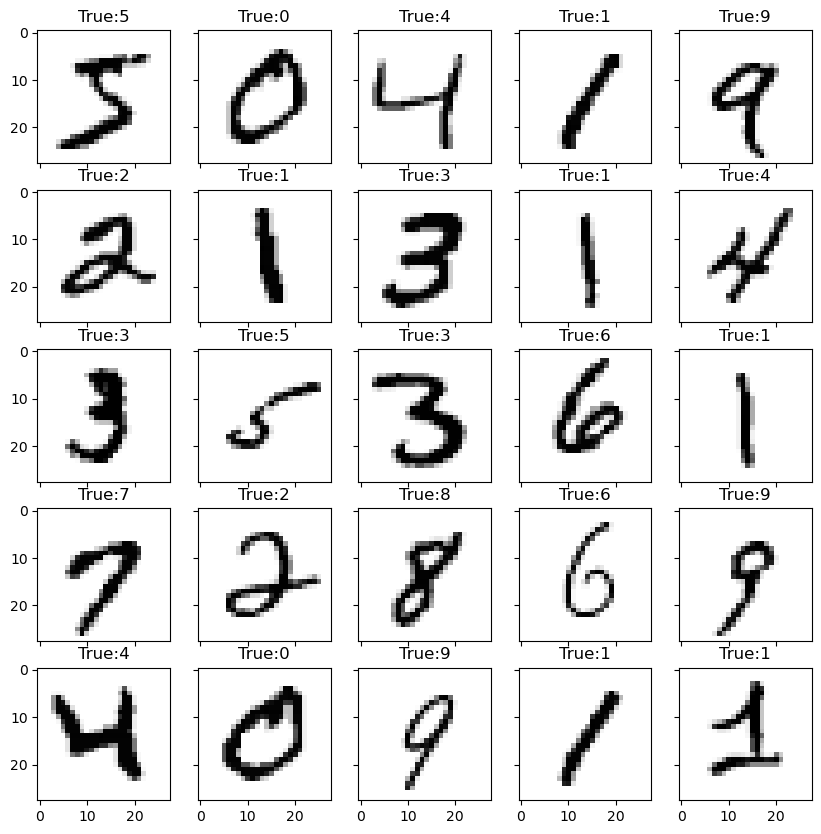

In [8]:
k = 5
fg, ax = plt.subplots(k, k, figsize=(2*k,2*k), sharex=True, sharey=True)
j = 0
for i1 in range(k):
    for i2 in range(k):
        ax[i1,i2].imshow(X_train[j], cmap='Greys')
        ax[i1,i2].set_title(f'True:{Y_train[j]}')
        j += 1

In [9]:
n_train = Y_train.size
Y_train_flat = np.zeros((n_train, 10))
for j in range(n_train):
    Y_train_flat[j, Y_train[j]] = 1.0

In [10]:
n_validate = Y_validate.size
Y_validate_flat = np.zeros((n_validate, 10))
for j in range(n_validate):
    Y_validate_flat[j, Y_validate[j]] = 1.0

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [15]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(
    x=X_train, 
    y=Y_train_flat, 
    batch_size=128, 
    epochs=10, 
    validation_data=(X_validate, Y_validate_flat)
)

Epoch 1/10
469/469 [==============================] - 42s 87ms/step - loss: 0.3316 - accuracy: 0.8999 - val_loss: 0.0825 - val_accuracy: 0.9749
Epoch 2/10
469/469 [==============================] - 40s 86ms/step - loss: 0.1068 - accuracy: 0.9674 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 3/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0813 - accuracy: 0.9748 - val_loss: 0.0446 - val_accuracy: 0.9858
Epoch 4/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0669 - accuracy: 0.9791 - val_loss: 0.0399 - val_accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0404 - val_accuracy: 0.9868
Epoch 6/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.0339 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0290 - val_accuracy:

In [17]:
model.save('mnist2.mdl')

2023-12-02 23:25:01.649723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1600]
	 [[{{node inputs}}]]
2023-12-02 23:25:01.927231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1600]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: mnist2.mdl/assets


INFO:tensorflow:Assets written to: mnist2.mdl/assets


In [10]:
my_num = imread("/Users/kiwiakos/Documents/vscode/numf.png")
my_num = 1.0 - my_num
plt.imshow(my_num, cmap='Greys')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kiwiakos/Documents/vscode/numf.png'

1/1 [==============================] - 0s 257ms/step


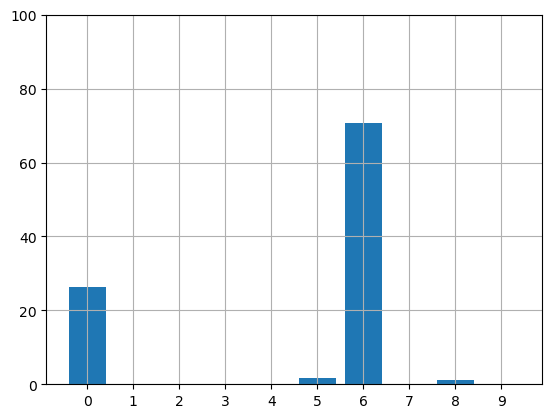

In [18]:
prediction = model.predict(np.reshape(my_num, (1, 28, 28)))
fg, ax = plt.subplots()
ax.bar([f'{j}' for j in range(10)], 100 * prediction.flatten())
ax.set_ylim(0, 100)
ax.grid()